In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b>Loading Data</b>

In [3]:
train = pd.read_csv('titanic_test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<b>Analyse Data</b>

<Axes: >

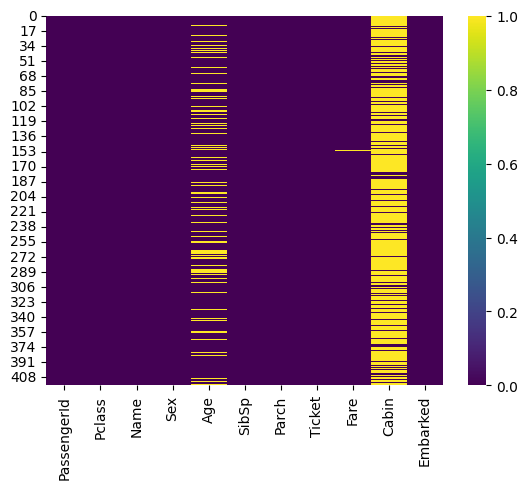

In [7]:
sns.heatmap(train.isnull(),cmap='viridis')

Analyse missing Age Values

In [13]:
missing_values = pd.isnull(train["Age"])
 
# Counting missing values in the "Team" column
missing_values_count = missing_values.sum()

print("missing values",missing_values_count)

total_values = train["Age"].count()

print("total values",total_values)

missing_age_percent = np.divide(missing_values,total_values)

print("missing_age_percent",missing_age_percent)

86
332
0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
413    0.003012
414    0.000000
415    0.000000
416    0.003012
417    0.003012
Name: Age, Length: 418, dtype: float64
